In [1]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# from pretty_confusion_matrix import pp_matrix

In [6]:
classes = ["beach","bus","cafe_restaurant","car","city_center","forest_path","grocery_store","home","library","metro_station","office","park","residential_area","train","tram"]

predicoes_cnn = np.array([])
predicoes_real= np.array([])

f_path = 'predicoes/'

n = 1404
# Leitura dos resultados salvos em arquivo

# CNN
for i in range(5):
    print(f'Leitura do arquivo:', f'{f_path}predicoes_cnn_fold{i+1}.txt')
    arq_cnn = open(f'{f_path}predicoes_cnn_fold{i+1}.txt')
    arquivo_completo = arq_cnn.read().split('\n')
    for  j in range(len(arquivo_completo)-1):
        aux = arquivo_completo[j].split(';')
        vetor_aux = np.array([])
        for k in aux:
            if k != '':
                vetor_aux = np.append(vetor_aux, float(k))
        if j == 0 and i == 0:
            predicoes_cnn = np.append(predicoes_cnn, vetor_aux)
        else:
            predicoes_cnn = np.vstack((predicoes_cnn, vetor_aux))
    print(f'Fim da leitura do arquivo:', f'{f_path}predicoes_cnn_fold{i+1}.txt')
    arq_cnn.close()

print()
# Real
for i in range(5):
    print(f'Leitura do arquivo:', f'{f_path}predicoes_real_fold{i+1}.txt')
    arq = open(f'{f_path}predicoes_real_fold{i+1}.txt')
    arquivo_completo = arq.read().split('\n')
    for  j in range(len(arquivo_completo)-1):
        aux = arquivo_completo[j].split(';')
        vetor_aux = np.array([])
        for k in aux:
            if k != '':
                vetor_aux = np.append(vetor_aux, float(k))
        if j == 0 and i == 0:
            predicoes_real = np.append(predicoes_real, vetor_aux)
        else:
            predicoes_real = np.vstack((predicoes_real, vetor_aux))
    print(f'Fim da leitura do arquivo:', f'{f_path}predicoes_real_fold{i+1}.txt')
    arq.close()

Leitura do arquivo: predicoes/predicoes_cnn_fold1.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold1.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold2.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold2.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold3.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold3.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold4.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold4.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold5.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold5.txt

Leitura do arquivo: predicoes/predicoes_real_fold1.txt
Fim da leitura do arquivo: predicoes/predicoes_real_fold1.txt
Leitura do arquivo: predicoes/predicoes_real_fold2.txt
Fim da leitura do arquivo: predicoes/predicoes_real_fold2.txt
Leitura do arquivo: predicoes/predicoes_real_fold3.txt
Fim da leitura do arquivo: predicoes/predicoes_real_fold3.txt
Leitura do arquivo: predicoes/predicoes_real_fold4.txt
Fim da leitura do 

In [7]:
acc_cnn = accuracy_score(predicoes_real, np.argmax(predicoes_cnn, axis=1))
print("acc_cnn:", acc_cnn)

acc_cnn: 0.9156695156695157


/tmp/ipykernel_70278/3502269409.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicoes_real_classes.append(classes[int(predicoes_real[i])])


0.9156695156695157


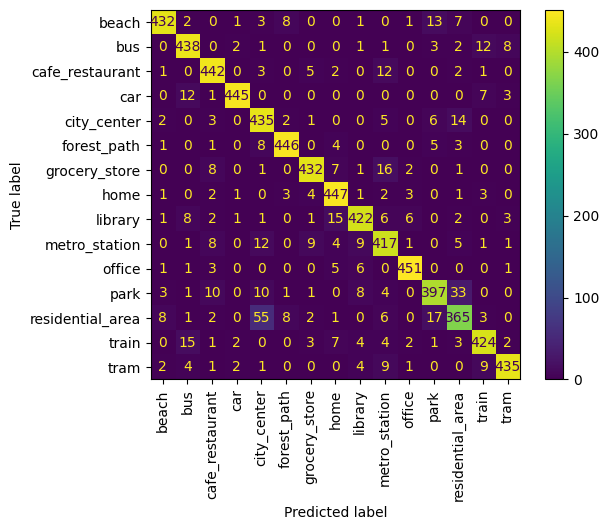

                  precision    recall  f1-score   support

           beach       0.96      0.92      0.94       468
             bus       0.91      0.94      0.92       468
 cafe_restaurant       0.91      0.94      0.93       468
             car       0.98      0.95      0.97       468
     city_center       0.82      0.93      0.87       468
     forest_path       0.95      0.95      0.95       468
   grocery_store       0.94      0.92      0.93       468
            home       0.91      0.96      0.93       468
         library       0.92      0.90      0.91       468
   metro_station       0.87      0.89      0.88       468
          office       0.97      0.96      0.96       468
            park       0.90      0.85      0.87       468
residential_area       0.83      0.78      0.81       468
           train       0.92      0.91      0.91       468
            tram       0.96      0.93      0.94       468

        accuracy                           0.92      7020
       macro

In [10]:
predicoes_cnn_classes = []
predicoes_real_classes = []
predicoes_cnn = np.argmax(predicoes_cnn, axis=1)

for i in range(len(predicoes_cnn)):
    predicoes_cnn_classes.append(classes[int(predicoes_cnn[i])])
    predicoes_real_classes.append(classes[int(predicoes_real[i])])

matriz_confusao = confusion_matrix(predicoes_real, predicoes_cnn)
relatorio_classificacao = classification_report(predicoes_real_classes, predicoes_cnn_classes)

acc = accuracy_score(predicoes_real, predicoes_cnn)
print(acc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=classes)

cm_display.plot()

plt.xticks(rotation=90)
plt.show()

print(relatorio_classificacao)